In [ ]:
%load_ext autoreload
%autoreload 2

from swot_wetland_functions import *

## Coongie Lakes Outputs

*Ensure that the site_specific_variables.py has the variables defined for Coongie Lakes uncommented, with all other variables for Barmah-Millewa Forest commented out.*

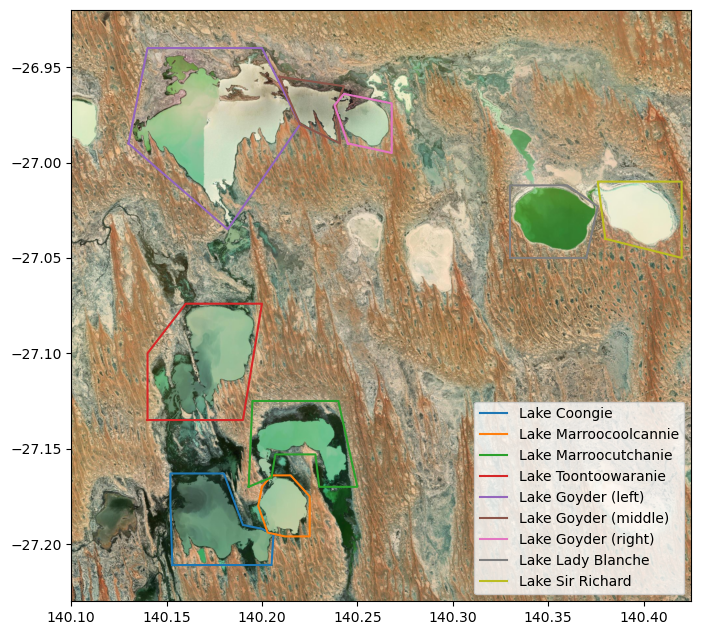

In [29]:
lake_cross_sections = {'Coongie': LineString([(140.156, -27.175), (140.203, -27.20)]),
                       'Marroocoolcannie': LineString([(140.205, -27.194), (140.212, -27.166)]),
                       'Marroocutchanie': LineString([(140.203, -27.165), (140.20, -27.143), (140.23, -27.14), (140.237, -27.165)]),
                       'Toontoowaranie': LineString([(140.155, -27.12), (140.173, -27.12), (140.19, -27.078)]),
                       'Goyder': LineString([(140.176, -27.02), (140.165, -26.99), (140.20, -26.973), (140.225, -26.967), (140.243, -26.9695), (140.243, -26.975), (140.266, -26.98)]),
                       'Lady Blanche': LineString([(140.334, -27.03), (140.375, -27.026)]),
                       'Sir Richard': LineString([(140.376, -27.015), (140.413, -27.038)])}

lake_polygons = {'Lake Coongie': Polygon([(140.153, -27.211), (140.152, -27.18), (140.152, -27.163), (140.18, -27.163), (140.19, -27.19), (140.20, -27.192), (140.206, -27.195), (140.205, -27.211)]), 
                 'Lake Marroocoolcannie': Polygon([(140.2, -27.17), (140.205, -27.164), (140.215, -27.164), (140.225, -27.175), (140.225, -27.196), (140.212, -27.196), (140.203, -27.194), (140.198, -27.18)]), 
                 'Lake Marroocutchanie': Polygon([(140.193, -27.17), (140.205, -27.165), (140.207, -27.153), (140.228, -27.153), (140.23, -27.17), (140.25, -27.17), (140.24, -27.125), (140.195, -27.125)]), 
                 'Lake Toontoowaranie': Polygon([(140.14, -27.135), (140.14, -27.1), (140.16, -27.074), (140.2, -27.074), (140.19, -27.135)]),
                 'Lake Goyder (left)': Polygon([(140.13, -26.99), (140.14, -26.94), (140.20, -26.94), (140.22, -26.98), (140.182, -27.035)]), 
                 'Lake Goyder (middle)': Polygon([(140.209, -26.955), (140.22, -26.98), (140.241, -26.99), (140.239, -26.97), (140.243, -26.96)]), 
                 'Lake Goyder (right)': Polygon([(140.245, -26.99), (140.238, -26.97), (140.243, -26.964), (140.268, -26.969), (140.268, -26.995)]), 
                 'Lake Lady Blanche': Polygon([(140.33, -27.05), (140.33, -27.012), (140.36, -27.012), (140.376, -27.023), (140.37, -27.05)]), 
                 'Lake Sir Richard': Polygon([(140.38, -27.04), (140.376, -27.01), (140.42, -27.01), (140.42, -27.05)]) 
                 }

fig, ax = plt.subplots(figsize=(8,8))        
ax.imshow(img, extent=[140.0, 140.5, -27.4, -26.9])
for lake_poly in lake_polygons:
    x,y = lake_polygons[lake_poly].exterior.xy
    plt.plot(x, y, '-', label=lake_poly)
plt.legend()
plt.xlim(140.1, 140.425)
plt.ylim(-27.23, -26.92)
plt.show()

### Figure 1

In [ ]:
las_directory = 'Coongie Lakes LiDAR/Department of Climate Change, Energy, the Environment and Water/Point Clouds/AHD/'  # directory containing LiDAR point cloud files (.laz)
average_elevation_grid = lidar_avg_grid(las_directory, (410000, 6980000, 443000, 7030000), 100, 'gridded_lidar_410_6980_443_7030.npy')

Processing LAS files: 100%|██████████| 2910/2910 [36:11<00:00,  1.34it/s]  

Saved average grid to: gridded_lidar_410_6980_443_7030.npy


SWOT_L2_HR_PIXC_015_407_107R_20240522T203008_20240522T203019_PIC0_01.nc, 155.01 km2, 151.90343524475136 GL


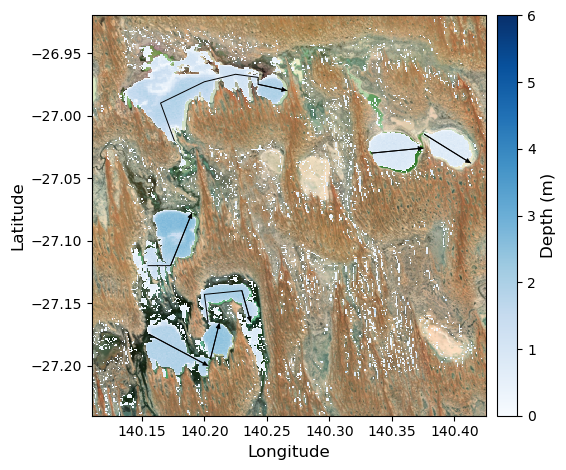

SWOT_L2_HR_PIXC_032_407_107R_20250512T131628_20250512T131639_PID0_01.nc, 448.67 km2, 920.9461180348695 GL


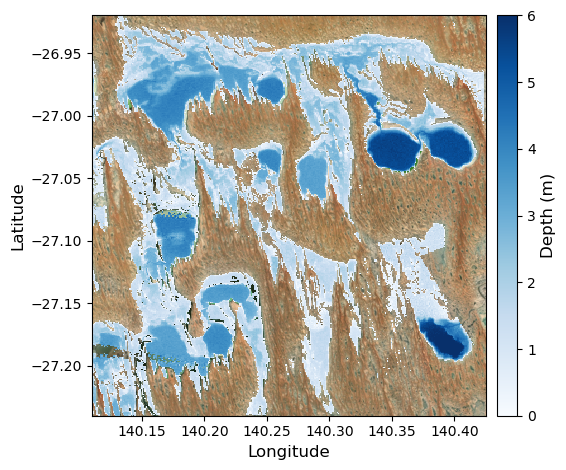

SWOT_L2_HR_PIXC_009_407_107R_20240118T155941_20240118T155953_PGC0_01.nc, 119.35000000000001 km2, 67.35347185353157 GL


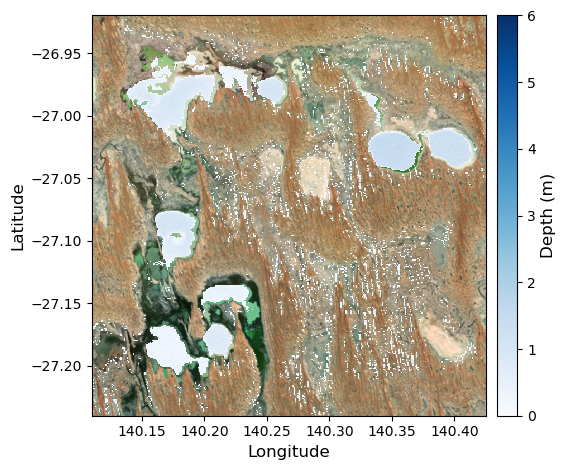

SWOT_L2_HR_PIXC_029_407_107R_20250310T230114_20250310T230126_PIC2_01.nc, 89.72 km2, 40.75840750895308 GL


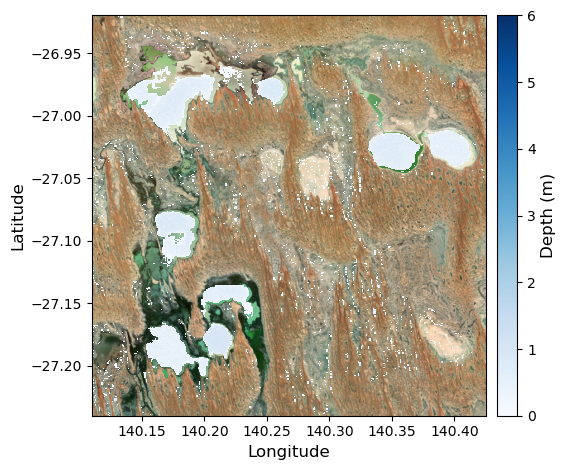

In [ ]:
directory = 'Coongie Lakes/'  # directory containing SWOT PIXC files
file_list = [ 
            'SWOT_L2_HR_PIXC_015_407_107R_20240522T203008_20240522T203019_PIC0_01.nc',
            'SWOT_L2_HR_PIXC_032_407_107R_20250512T131628_20250512T131639_PID0_01.nc',
            'SWOT_L2_HR_PIXC_009_407_107R_20240118T155941_20240118T155953_PGC0_01.nc',
            'SWOT_L2_HR_PIXC_029_407_107R_20250310T230114_20250310T230126_PIC2_01.nc'
             ]
elevation_grid = np.load('gridded_lidar_410_6980_443_7030.npy')
min_x, min_y, max_x, max_y = 410000, 6980000, 443000, 7030000

full_site_water_depth(directory, file_list, elevation_grid, min_x, min_y, max_x, max_y, lake_cross_sections)

In [ ]:
coongie_m_m_a = Polygon([(-27.25, 140.1), (-27.1, 140.1), (-27.1, 140.25), (-27.25, 140.25)])
lb_sr = Polygon([(-27.07, 140.32), (-26.97, 140.32), (-26.97, 140.45), (-27.07, 140.45)])
goyder = Polygon([(-27.05, 140.125), (-26.94, 140.125), (-26.94, 140.27), (-27.05, 140.27)])
toontoowaranie = Polygon([(-27.17, 140.13), (-27.05, 140.13), (-27.05, 140.22), (-27.17, 140.22)])

point_cloud_to_df(las_directory, lb_sr, 'lb_sr.parquet')
point_cloud_to_df(las_directory, coongie_m_m_a, 'coongie_m_m_a.parquet')
point_cloud_to_df(las_directory, toontoowaranie, 'toontoowaranie.parquet')
point_cloud_to_df(las_directory, goyder, 'goyder.parquet')

In [ ]:
extract_elevation_transect(lake_cross_sections, ['Coongie', 'Marroocoolcannie', 'Marroocutchanie'], 'coongie_m_m_a.parquet')
extract_elevation_transect(lake_cross_sections, ['Goyder'], 'goyder.parquet')
extract_elevation_transect(lake_cross_sections, ['Lady Blanche', 'Sir Richard'], 'lb_sr.parquet')
extract_elevation_transect(lake_cross_sections, ['Toontoowaranie'], 'toontoowaranie.parquet')

SWOT_L2_HR_PIXC_009_407_107R_20240118T155941_20240118T155953_PGC0_01.nc
SWOT_L2_HR_PIXC_010_407_107R_20240208T124446_20240208T124457_PIC0_01.nc
SWOT_L2_HR_PIXC_011_366_202L_20240227T223618_20240227T223629_PIC0_01.nc
SWOT_L2_HR_PIXC_014_407_107R_20240501T234504_20240501T234515_PIC0_01.nc
SWOT_L2_HR_PIXC_015_407_107R_20240522T203008_20240522T203019_PIC0_01.nc
SWOT_L2_HR_PIXC_018_060_202R_20240712T012901_20240712T012912_PIC0_01.nc
SWOT_L2_HR_PIXC_019_407_107R_20240814T073028_20240814T073039_PIC0_01.nc
SWOT_L2_HR_PIXC_021_407_107R_20240925T010040_20240925T010051_PIC0_01.nc


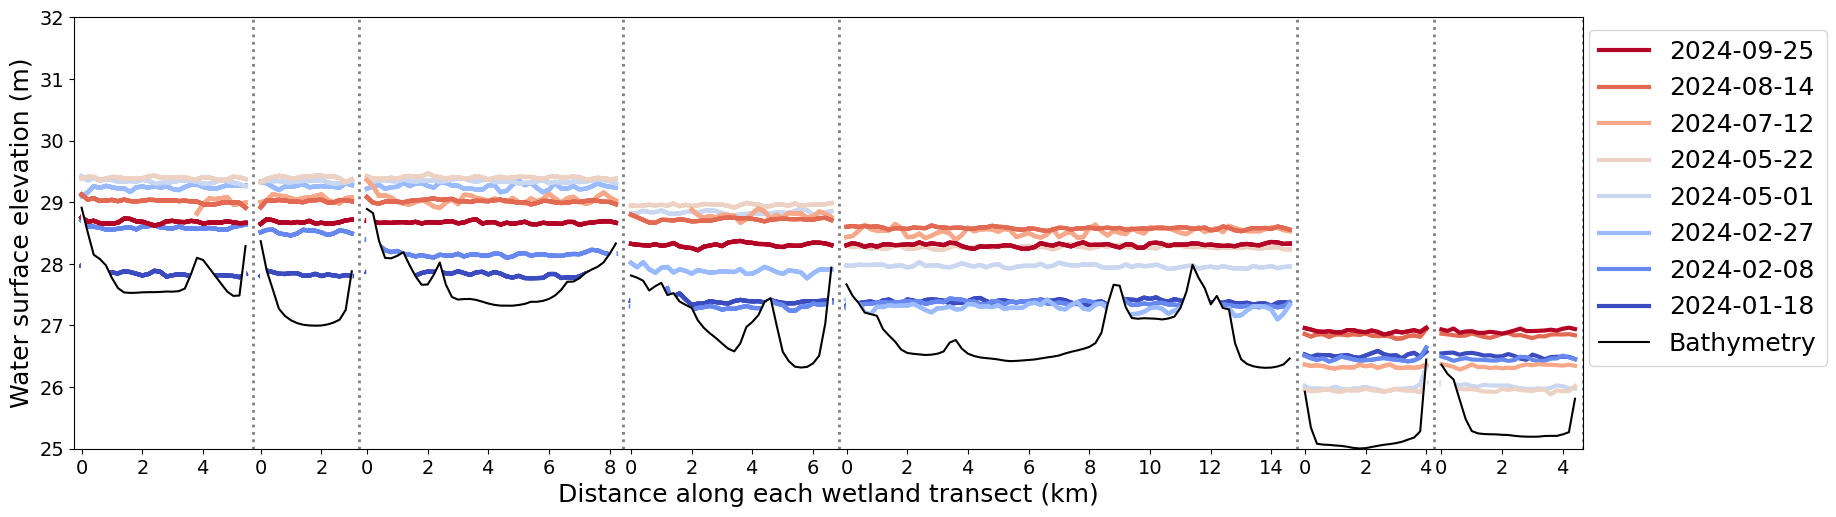

SWOT_L2_HR_PIXC_028_407_107R_20250218T021611_20250218T021622_PIC2_01.nc
SWOT_L2_HR_PIXC_029_407_107R_20250310T230114_20250310T230126_PIC2_01.nc
SWOT_L2_HR_PIXC_031_366_202L_20250420T053752_20250420T053803_PIC2_01.nc
SWOT_L2_HR_PIXC_031_407_107R_20250421T163125_20250421T163136_PIC2_01.nc
SWOT_L2_HR_PIXC_032_407_107R_20250512T131628_20250512T131639_PID0_01.nc
SWOT_L2_HR_PIXC_034_407_107R_20250623T064639_20250623T064650_PID0_01.nc
SWOT_L2_HR_PIXC_037_407_107R_20250824T210155_20250824T210206_PID0_01.nc


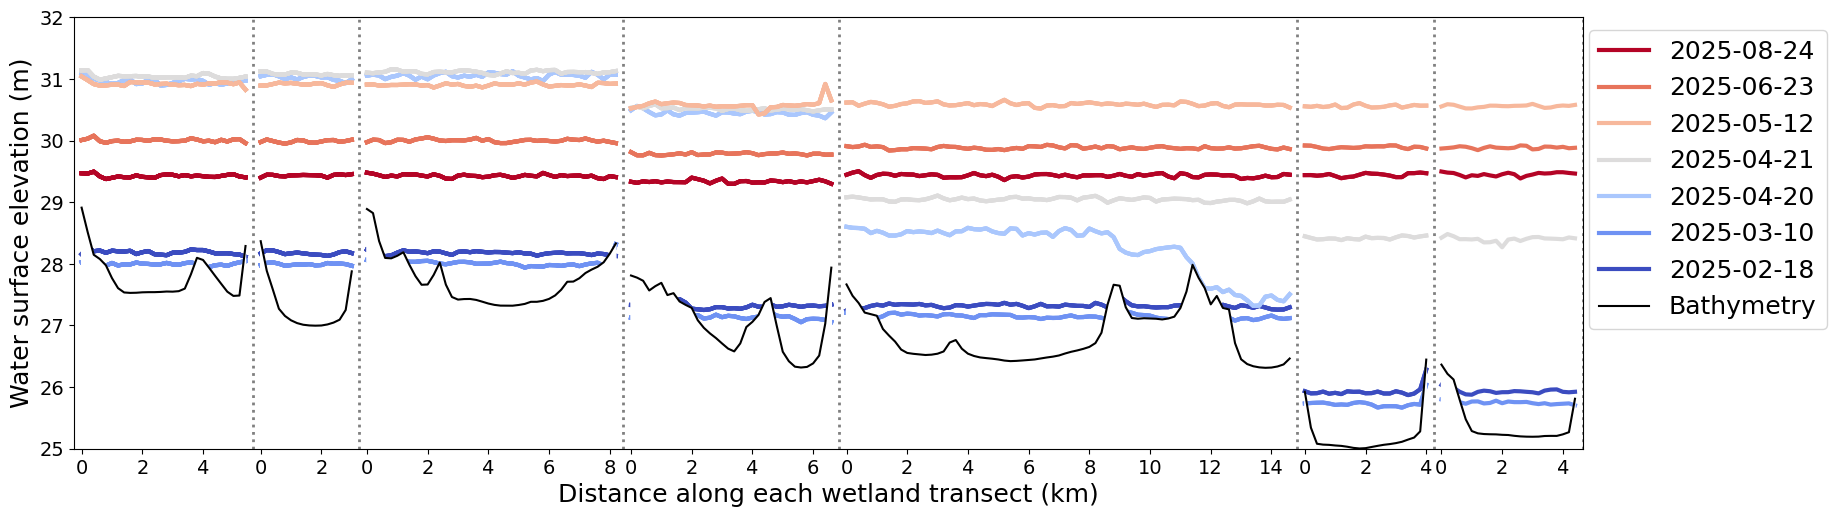

In [ ]:
file_list = ['SWOT_L2_HR_PIXC_009_407_107R_20240118T155941_20240118T155953_PGC0_01.nc',
             'SWOT_L2_HR_PIXC_010_407_107R_20240208T124446_20240208T124457_PIC0_01.nc',
             'SWOT_L2_HR_PIXC_011_366_202L_20240227T223618_20240227T223629_PIC0_01.nc',
             'SWOT_L2_HR_PIXC_014_407_107R_20240501T234504_20240501T234515_PIC0_01.nc',
             'SWOT_L2_HR_PIXC_015_407_107R_20240522T203008_20240522T203019_PIC0_01.nc',
             'SWOT_L2_HR_PIXC_018_060_202R_20240712T012901_20240712T012912_PIC0_01.nc',
             'SWOT_L2_HR_PIXC_019_407_107R_20240814T073028_20240814T073039_PIC0_01.nc',
             'SWOT_L2_HR_PIXC_021_407_107R_20240925T010040_20240925T010051_PIC0_01.nc']

cross_sectional_wse_topography(lake_cross_sections, file_list, mask_with_no_prior_included)
# cross_sectional_wse_topography_from_saved(lake_cross_sections, file_list)

file_list = [
         'SWOT_L2_HR_PIXC_028_407_107R_20250218T021611_20250218T021622_PIC2_01.nc',
         'SWOT_L2_HR_PIXC_029_407_107R_20250310T230114_20250310T230126_PIC2_01.nc',
         'SWOT_L2_HR_PIXC_031_366_202L_20250420T053752_20250420T053803_PIC2_01.nc',
         'SWOT_L2_HR_PIXC_031_407_107R_20250421T163125_20250421T163136_PIC2_01.nc',
         'SWOT_L2_HR_PIXC_032_407_107R_20250512T131628_20250512T131639_PID0_01.nc',
         'SWOT_L2_HR_PIXC_034_407_107R_20250623T064639_20250623T064650_PID0_01.nc',
         'SWOT_L2_HR_PIXC_037_407_107R_20250824T210155_20250824T210206_PID0_01.nc']

cross_sectional_wse_topography(lake_cross_sections, file_list, mask_with_no_prior_included)
# cross_sectional_wse_topography_from_saved(lake_cross_sections, file_list)

### Figure 4 & Supplementary Figure 6 (Time Series)

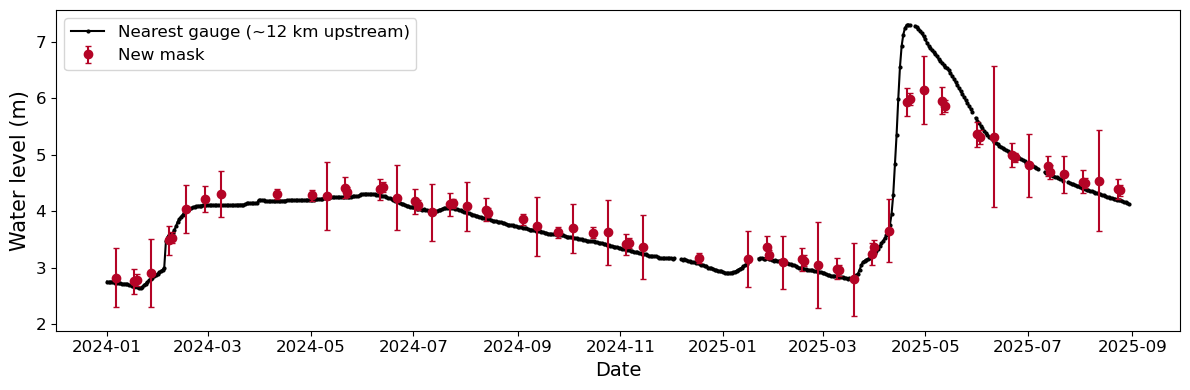

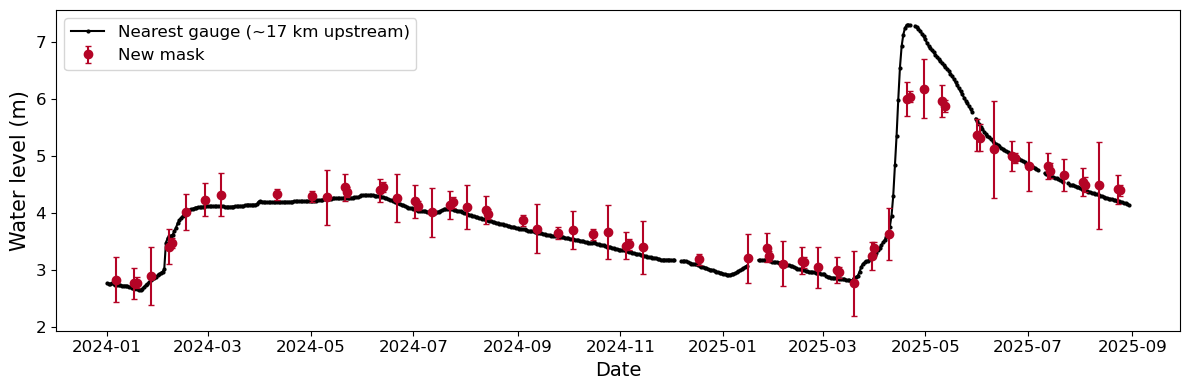

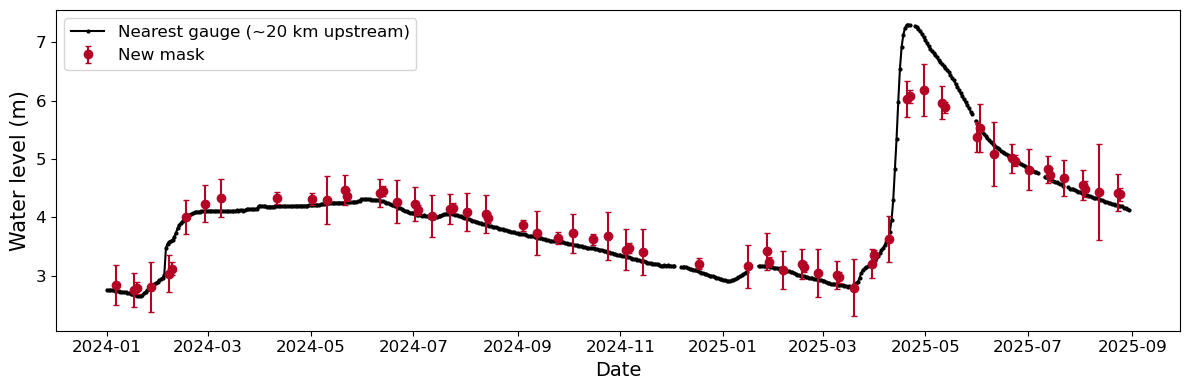

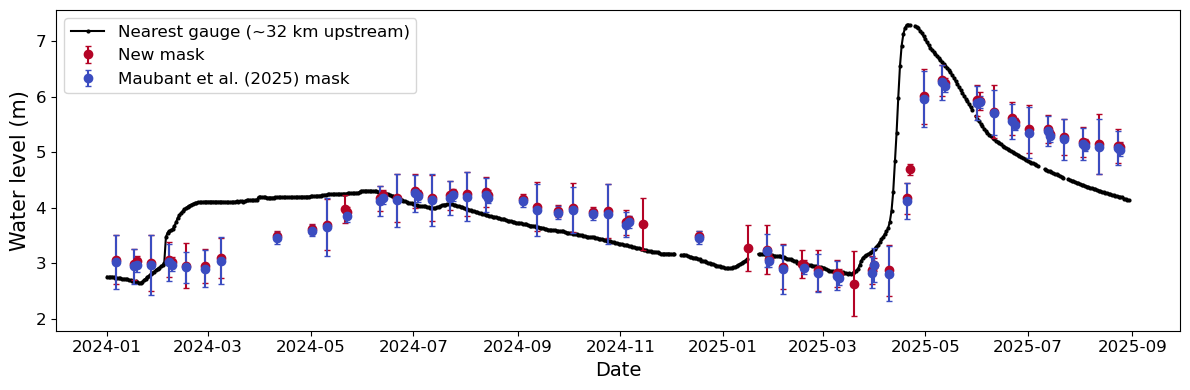

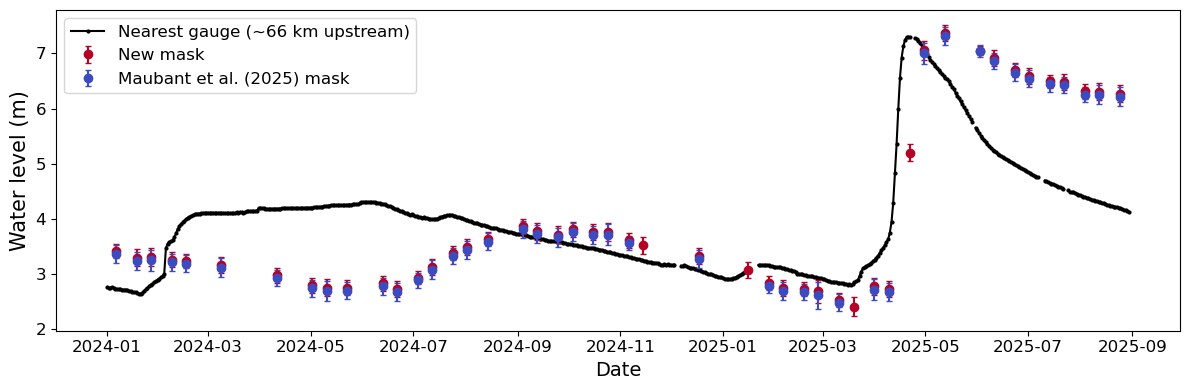

In [ ]:
new_mask_filename = 'without_no_prior'
maubant_mask_filename = 'Maubant'

wetland_time_series(directory, lake_polygons, mask_with_no_prior_excluded, mask_with_no_prior_excluded, new_mask_filename)
wetland_time_series(directory, lake_polygons, Maubant_C, Maubant_D, maubant_mask_filename)

wetland_list = ['Lake Coongie', 'Lake Marroocoolcannie', 'Lake Marroocutchanie', 'Lake Goyder (left)', 'Lake Sir Richard']
gauge = ['ascii.w00078.20250901101439.A0031007.txt']

distances = [12, 17, 20, 32, 66]
for wetland, distance in zip(wetland_list, distances):
    wetland = [wetland]
    if wetland == ["Lake Goyder (left)"] or wetland == ["Lake Sir Richard"]:
        plot_time_series(wetland, gauge, new_mask_filename, maubant_mask_filename, wrmse=False, label=f'Nearest gauge (~{distance} km upstream)', threshold_days=1)
    else:
        plot_time_series(wetland, gauge, new_mask_filename, maubant_mask_filename, wrmse=False, maubant=False, label=f'Nearest gauge (~{distance} km upstream)', threshold_days=1)

### Supplementary Figure 1

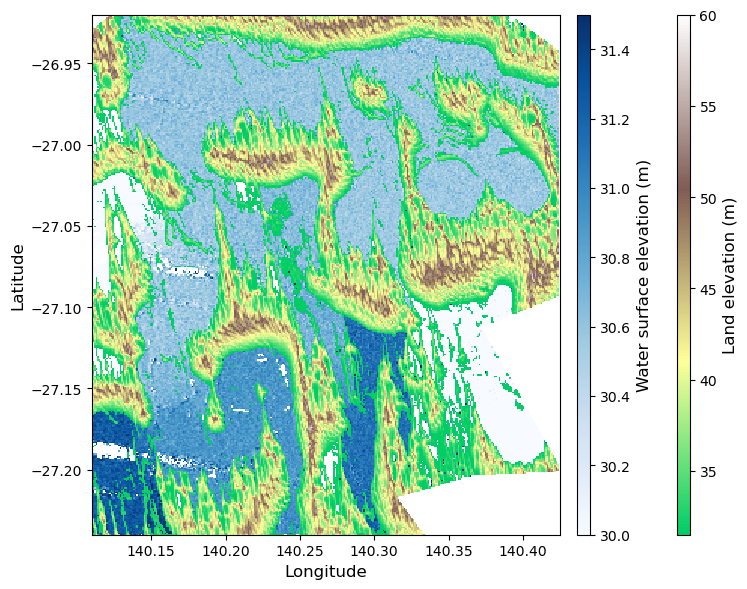

In [ ]:
from scipy.interpolate import griddata
import cmasher as cmr

lons = np.load("Paper Output Data/lon_x_edges_100m.npy")
lats = np.load("Paper Output Data/lat_y_edges_100m.npy")

elevation = np.load("Paper Output Data/elevation_grid_2025-05-12_100m.npy")
height_2025 = np.load("Paper Output Data/water_height_2025-05-12_100m.npy")
water_only = np.load("Paper Output Data/elevation_grid_2025-05-12_100m.npy")
elev_only = np.load("Paper Output Data/elevation_grid_2025-05-12_100m.npy")
elev_all = elev_only

f = open("Paper Output Data/water_height.lonlat", "w")
for icol in range (len(elevation[:,0])):
    for irow in range (len(elevation[0,:])):
        if height_2025[icol,irow] != np.nan :
            if height_2025[icol,irow] > elev_only[icol,irow]:
                water_only[icol,irow] = height_2025[icol,irow]
                elev_only[icol,irow] = np.nan
                elev_all[icol,irow] = height_2025[icol,irow]
                f.write("{0:15.6f}{1:15.6f}{2:15.3f}\n".format(lons[irow],lats[icol],height_2025[icol,irow]) )   
            else :
                water_only[icol,irow] = np.nan
                elev_all[icol,irow] = elev_only[icol,irow]
                if elev_all[icol,irow] < 30 :
                    elev_all[icol,irow] = 100.
f.close()

plt.figure(figsize=(8,6))
cmap_terrain_trunc = cmr.get_sub_cmap(plt.cm.terrain, 0.25, 1.0)
mesh  = plt.pcolormesh(lons, lats, elev_all, shading="auto", cmap=cmap_terrain_trunc, vmin=31.5, vmax=60)
cbar  = plt.colorbar(mesh,pad=0.02,aspect=40)
cbar.set_label('Land elevation (m)', fontsize=12)
mesh2 = plt.pcolormesh(lons, lats, water_only, shading="auto",cmap='Blues', vmin=30, vmax=31.5)
cbar2 = plt.colorbar(mesh2,location = 'right',cmap='Blues',pad=0.03, aspect=40)
cbar2.set_label('Water surface elevation (m)', fontsize=12)
plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)
plt.tight_layout()
plt.savefig("Paper Output Data/elevation_landwatersurface.png")
plt.show()

### Supplementary Figure 5

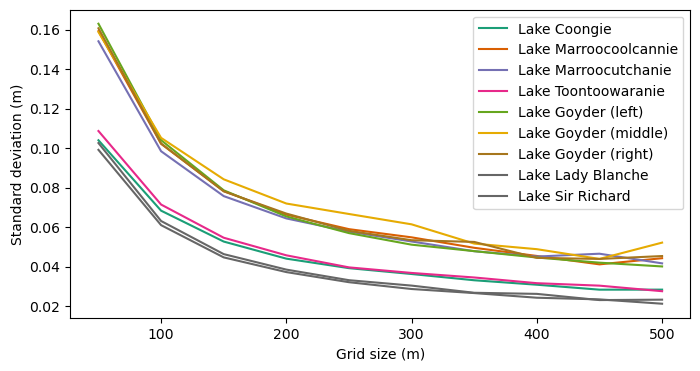

In [ ]:
compute_gridded_wetland_standard_deviation(directory, lake_polygons, mask_with_no_prior_excluded, 'mask_with_no_prior_excluded')

insufficient_coverage = {
                 'Lake Coongie': ['2025-07-14'], 
                 'Lake Marroocoolcannie': ['2025-06-10', '2025-07-14', '2025-08-12'],
                 'Lake Marroocutchanie': ['2024-10-03', '2024-11-04', '2025-06-02', '2025-06-10', '2025-07-14', '2025-08-04', '2025-08-12'],
                 'Lake Toontoowaranie': ['2024-11-04', '2025-06-02', '2025-07-14', '2025-08-04'],
                 'Lake Goyder (left)': ['2024-02-17', '2025-01-26', '2025-02-26', '2025-06-02'],
                 'Lake Goyder (middle)': ['2024-02-17', '2024-03-08', '2024-11-04', '2025-01-26', '2025-02-26', '2025-03-09', '2025-03-30', '2025-06-02', '2025-06-10', '2025-08-23'],
                 'Lake Goyder (right)': ['2024-02-17',  '2024-11-04', '2025-01-26', '2025-02-26', '2025-06-02', '2025-07-22', '2025-08-23'],
                 'Lake Lady Blanche': ['2025-02-26', '2025-06-02'], 
                 'Lake Sir Richard': ['2025-02-26', '2025-06-02'] 
                 }

plot_grid_size_stdev(lake_polygons, 'mask_with_no_prior_excluded', insufficient_coverage)

# Barmah-Millewa Forest Outputs

*Ensure that the site_specific_variables.py has the variables defined for Barmah-Millewa Forest uncommented, with all other variables for Coongie Lakes commented out.*

In [ ]:
directory = 'BM SWOT Data/' # directory containing SWOT PIXC files

wetland_polygons = {
    'Moira Lake': Polygon([(144.95296331669135, -35.95515960535324), (144.95303437306723, -35.947969467633726), (144.9487709905443, -35.94192924624932), (144.94905521604602, -35.936866609852295), (144.94770514491324, -35.933242023255545), (144.9480604267893, -35.92604989118579), (144.95033423080162, -35.92000799467479), (144.95239486568795, -35.91488640667628), (144.94074162012487, -35.911606114323526), (144.93320964433445, -35.915634524481604), (144.9185720310055, -35.92783360094414), (144.9194957638864, -35.94227441419429), (144.95296331669135, -35.95515960535324)]),
    'Barmah Lake': Polygon([(144.9579216976769, -35.955463736666466), (144.96920547576138, -35.94389325626739), (144.96544421639874, -35.93536655490567), (144.98040567030404, -35.931576614590405), (144.96435763036152, -35.914045777355156), (144.9543276053979, -35.92534988963989), (144.9525723510294, -35.9340130256513), (144.95265593456958, -35.9407804401624), (144.956667944556, -35.94626162116779), (144.95441118893808, -35.95235137638089), (144.9579216976769, -35.955463736666466)]),
    'Duck Lagoon': Polygon([(144.92902856912383, -35.874187535771206), (144.9396099558873, -35.869754182171384), (144.93948971285533, -35.86005840172721), (144.93077209308024, -35.85547807286593), (144.93510084221037, -35.84943553212122), (144.93474011311423, -35.83988348017973), (144.92494030605775, -35.83652049424301), (144.91964961267598, -35.836666713987185), (144.91544110657793, -35.85367510487943), (144.91471964839036, -35.85923006398212), (144.92902856912383, -35.874187535771206)]),
    'Reedy Lake': Polygon([(145.091101604754, -35.883118346422116), (145.08136781379966, -35.867491761598444), (145.05046302752532, -35.87646386850809), (145.05435654390658, -35.88094954095689), (145.08021192612608, -35.88361124847158), (145.0848354768275, -35.89080726905844), (145.091101604754, -35.883118346422116)]),
    'Reedy Beds': Polygon([(144.97037689242057, -35.83829325641411), (144.94261451520276, -35.83098290558069), (144.9325312197986, -35.835520444008004), (144.94008258640145, -35.83955359365123), (144.93799485563454, -35.84308243138999), (144.9450576043983, -35.845782966468796), (144.94048236463294, -35.854424060787814), (144.9451464440059, -35.8560081592676), (144.9526978106088, -35.85395602563343), (144.9552741592148, -35.85773623060375), (144.9651797754056, -35.858708254175184), (144.97144296770637, -35.84610702450021), (144.97037689242057, -35.83829325641411),]),
    'Top Island': Polygon([(144.9907004607919, -35.89197255341505), (144.98931382819165, -35.88217638733972), (144.98803812619997, -35.874671165172344), (144.99009034244773, -35.8673899708085), (144.98631870177587, -35.861052090380966), (144.97045562482833, -35.86550214453263), (144.97356168185257, -35.874086896490034), (144.97949646938298, -35.8782665699115), (144.9726187716846, -35.89129854411451), (144.9907004607919, -35.89197255341505)]),
    }

In [ ]:
# Compute time series
wetland_time_series(directory, wetland_polygons, mask_with_no_prior_included, mask_with_no_prior_included, 'without_no_prior')
wetland_time_series(directory, wetland_polygons, Maubant_C, Maubant_D, 'Maubant')

### Figure 4a and Supplementary Figure 7

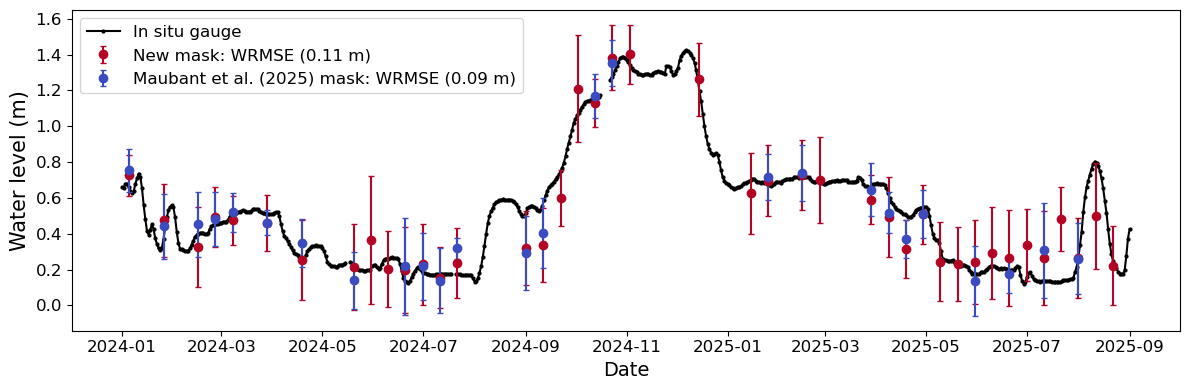

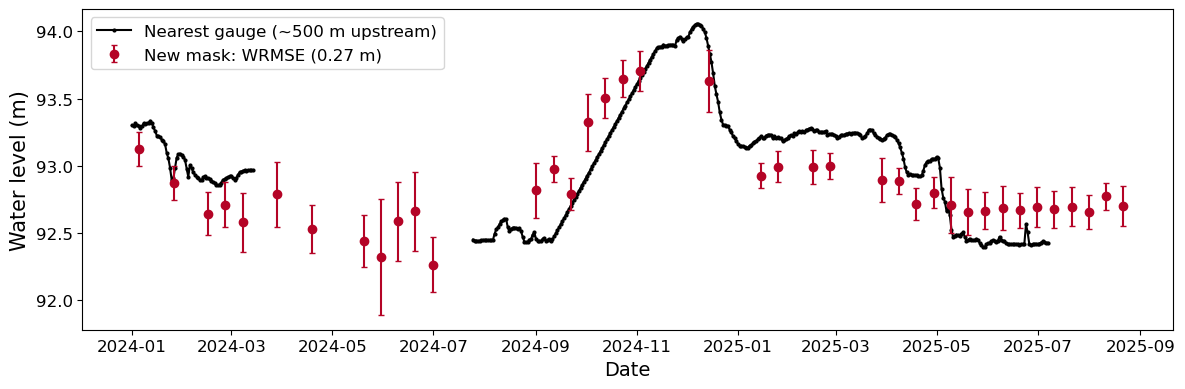

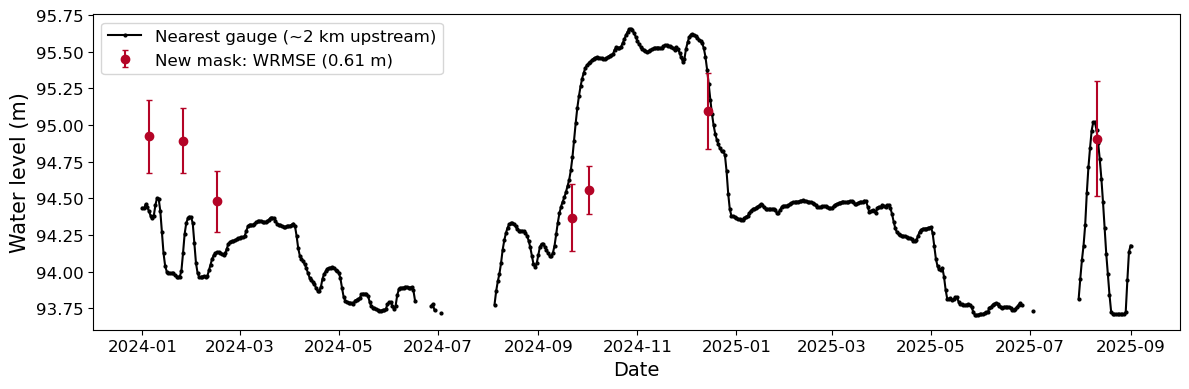

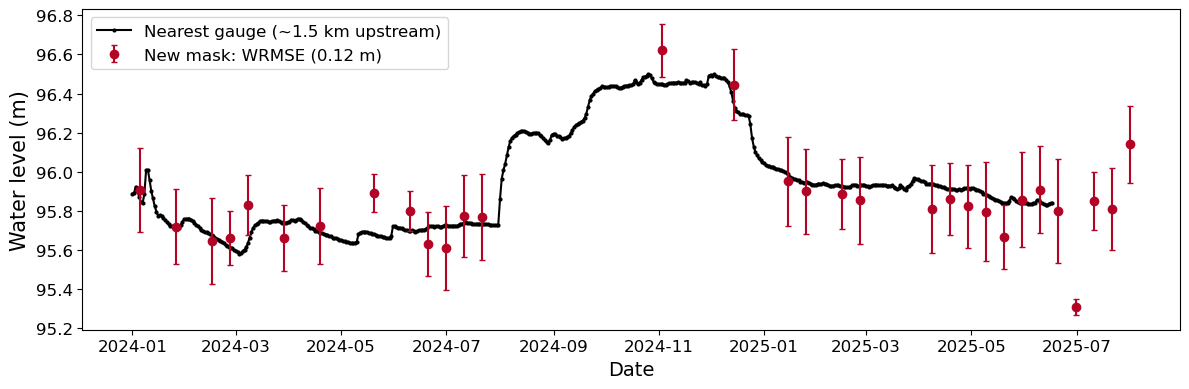

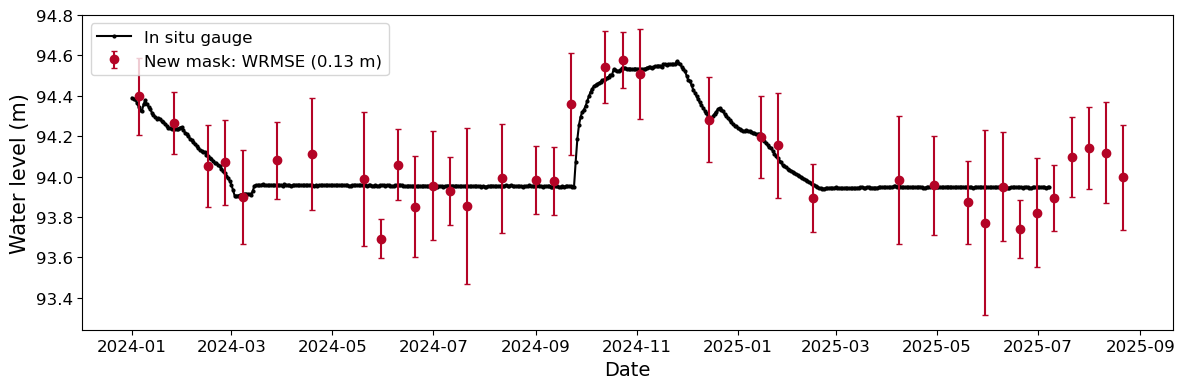

In [ ]:
new_mask_filename = 'without_no_prior'
maubant_mask_filename = 'Maubant'

wetland_list = ["Barmah Lake", "Moira Lake", "Top Island", "Reedy Lake", "Reedy Beds"]
gauge_list = ["new_gauges/barmah_lake/ascii.w00074.20250904100913.409398.txt",
              "new_gauges/moira_lake/ascii.w00074.20250904101003.409232.txt",
              "new_gauges/top_island/ascii.w00074.20250904101401.409397.txt", 
              "new_gauges/reedy_lake/ascii.w00074.20250904101145.409393.txt", 
              "new_gauges/reedy_bed/ascii.w00074.20250904101508.409230.txt"]
label_list = ['In situ gauge', 'Nearest gauge (~500 m upstream)', 'Nearest gauge (~2 km upstream)', 'Nearest gauge (~1.5 km upstream)', 'In situ gauge']

for wetland, gauge, label in zip(wetland_list, gauge_list, label_list):
    wetland = [wetland]
    gauge = [gauge]
    if wetland == ["Barmah Lake"]:
        plot_time_series(wetland, gauge, new_mask_filename, maubant_mask_filename, wrmse=True, label=label, threshold_days=1)
    else: 
        plot_time_series(wetland, gauge, new_mask_filename, maubant_mask_filename, wrmse=True, maubant=False, label=label, threshold_days=1)   

### Figure 2

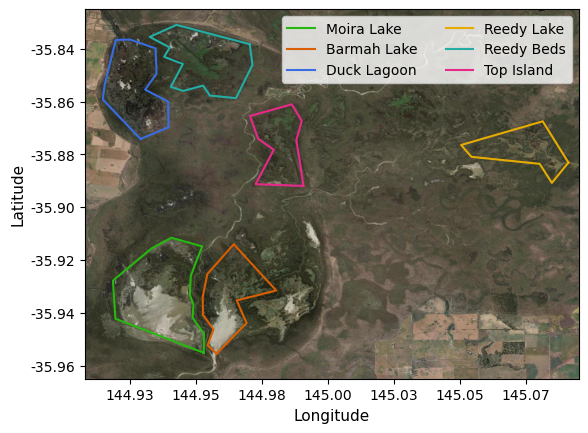

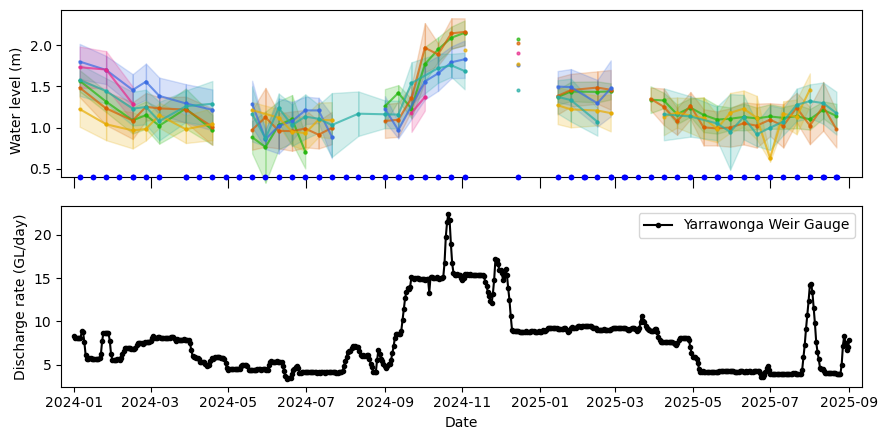

In [ ]:
gauge_filename = 'new_gauges/yarrawonga/ascii.w00077.20250904100506.409025.txt'
discharge_filename = 'ascii.w00077.20250918153421.409025.txt'
plot_all_time_series_gauge_discharge(gauge_filename, discharge_filename, wetland_polygons, new_mask_filename)

File: SWOT_L2_HR_PIXC_009_032_217R_20240105T064519_20240105T064530_PGC0_01.nc


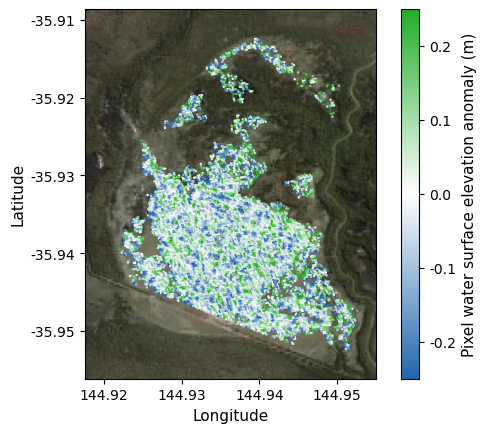

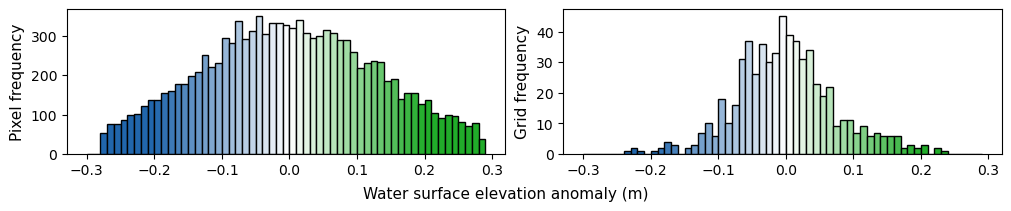

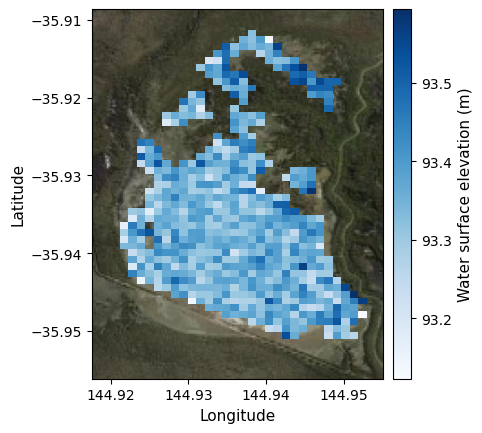

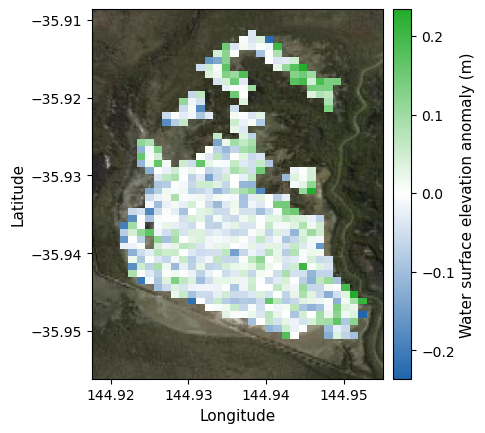

In [ ]:
file_list = ['SWOT_L2_HR_PIXC_009_032_217R_20240105T064519_20240105T064530_PGC0_01.nc']
height_anomaly_polygons = {'Moira Lake': Polygon([(144.95296331669135, -35.95515960535324), (144.95303437306723, -35.947969467633726), (144.9487709905443, -35.94192924624932), (144.94905521604602, -35.936866609852295), (144.94770514491324, -35.933242023255545), (144.9480604267893, -35.92604989118579), (144.95033423080162, -35.92000799467479), (144.95239486568795, -35.91488640667628), (144.94074162012487, -35.911606114323526), (144.93320964433445, -35.915634524481604), (144.9185720310055, -35.92783360094414), (144.9194957638864, -35.94227441419429), (144.95296331669135, -35.95515960535324)])}

gridded_wetland_height_anomaly(directory, file_list, height_anomaly_polygons, mask_with_no_prior_included)